Importamos las dependencias necesarias para el desarrollo del trabajo.

In [25]:
from main import runGame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Aqui vemos un ejemplo de como ejecutar el juego.

In [101]:
runGame(['main.py', '-l', 'level2.txt', '-m', 'astar', '-H', 'manhattan'])

{'success': True,
 'method': 'astar',
 'level': 'level2.txt',
 'heuristic': 'manhattan',
 'cost': 78,
 'exloredNodes': 58629,
 'frontierNodes': 97,
 'runtime': 8.877659797668457}

Ahora realizamos 10 iteraciones de la función runGame con cada algoritmo de búsqueda, para cada nivel y para cada heuristica. Nos guardamos estos resultados en un dataframe para poder analizarlos más adelante.

In [4]:
methods = ['dfs', 'bfs', 'greedy', 'astar']
heuristics = ['manhattan', 'combined']
levels = ['level1.txt', 'level2.txt', 'level3.txt', 'level4.txt', 'level5.txt']

aux = []

for level in levels:
    for method in methods:
        for heuristic in heuristics:
            for _ in range(10):
                aux.append(runGame(['main.py', '-l', level, '-m', method, '-H', heuristic]))

df = pd.DataFrame(aux)
df

,success,method,level,heuristic,cost,exloredNodes,frontierNodes,runtime
0,True,dfs,level1.txt,manhattan,3,22,1,0.000000
1,True,dfs,level1.txt,manhattan,3,22,1,0.000000
2,True,dfs,level1.txt,manhattan,3,22,1,0.000000
3,True,dfs,level1.txt,manhattan,3,22,1,0.000000
4,True,dfs,level1.txt,manhattan,3,22,1,0.000000
...,...,...,...,...,...,...,...,...
395,False,astar,level5.txt,combined,0,17,0,0.000000
396,False,astar,level5.txt,combined,0,17,0,0.001007
397,False,astar,level5.txt,combined,0,17,0,0.000999
398,False,astar,level5.txt,combined,0,17,0,0.000000


En esta parte, normalizamos los datos obtenidos en el punto anterior. Como los algoritmos de búsqueda desinformados no utilizan heurísticas para decidir qué camino tomar, separamos el dataframe original en 2 diferentes: uno para los métodos de búsqueda desinformados y otro para los informados.

Una vez realizado ese proceso, del dataframe de los métodos desinformados, eliminamos la columna heurística ya que no es necesaria. Y del dataframe de los métodos informados, agregamos la heurística utilizada en cada caso como parte del nombre del método entre parentesis con el objetivo de luego eliminar la columna heurística y asi tener los dos dataframes con las mismas columnas.

Por último, concatenamos estos 2 dataframes en uno solo con el que trabajaremos más adelante para realizar los gráficos y analizar los datos.

In [5]:

informed_methods_df = df[(df['method'] == 'astar') | (df['method'] == 'greedy')]
informed_methods_df.loc[:, 'method'] = informed_methods_df['method'] + '(' + informed_methods_df['heuristic'] + ')'
informed_methods_df = informed_methods_df.drop('heuristic', axis=1)

uninformed_methods_df = df[(df['method'] == 'bfs') | (df['method'] == 'dfs')]
uninformed_methods_df = uninformed_methods_df.drop('heuristic', axis=1)

final_df = pd.concat([uninformed_methods_df, informed_methods_df])

Como medida de precaución, guardamos la información de los diferentes dataframes en archivos csv.

In [6]:
df.to_csv('data/data.csv')
uninformed_methods_df.to_csv('data/uninformed.csv')
informed_methods_df.to_csv('data/informed.csv')
final_df.to_csv('data/normalized_data.csv')

Si no se quiere volver a correr el código, se pueden cargar los archivos de datos ya procesados. Para ello descomentar la línea de código correspondiente en el siguiente bloque.


In [ ]:
# df = pd.read_csv('data/data.csv')
# uninformed_methods_df = pd.read_csv('data/uninformed.csv')
# informed_methods_df = pd.read_csv('data/informed.csv')
# final_df = pd.read_csv('data/normalized_data.csv')

In [8]:
final_df.groupby(['level','method']).mean(numeric_only=True)



success    cost  exloredNodes  frontierNodes  \
level      method                                                            
level1.txt astar(combined)        1.0     3.0           7.0            1.0   
           astar(manhattan)       1.0     3.0           7.0            1.0   
           bfs                    1.0     3.0           7.0            1.0   
           dfs                    1.0     3.0          22.0            1.0   
           greedy(combined)       1.0     3.0           6.0            1.0   
           greedy(manhattan)      1.0     3.0           6.0            1.0   
level2.txt astar(combined)        1.0    78.0       58387.0          137.0   
           astar(manhattan)       1.0    78.0       58629.0           97.0   
           bfs                    1.0    78.0       58804.0           54.0   
           dfs                    1.0  1698.0       19064.0          706.0   
           greedy(combined)       1.0   104.0        1765.0          131.0   
           greedy(manhattan)      1.0   104.0        1763.0          133.0   
level3.txt astar(combined)        1.0    10.0          77.0           21.0   
           astar(manhattan)       1.0    10.0          77.0           21.0   
           bfs                    1.0    10.0         136.0           43.0   
           dfs                    1.0    14.0         102.0            9.0   
           greedy(combined)       1.0    10.0          30.0            8.0   
           greedy(manhattan)      1.0    10.0          30.0            8.0   
level4.txt astar(combined)        1.0    60.0       86402.0         3884.0   
           astar(manhattan)       1.0    60.0       96954.0         3356.0   
           bfs                    1.0    60.0      112694.0         1732.0   
           dfs                    1.0  2912.0      106160.0         1409.0   
           greedy(combined)       1.0    74.0         806.0           85.0   
           greedy(manhattan)      1.0    64.0        1071.0          138.0   
level5.txt astar(combined)        0.0     0.0          17.0            0.0   
           astar(manhattan)       0.0     0.0          17.0            0.0   
           bfs                    0.0     0.0          17.0            0.0   
           dfs                    0.0     0.0          17.0            0.0   
           greedy(combined)       0.0     0.0          17.0            0.0   
           greedy(manhattan)      0.0     0.0          17.0            0.0   

                                runtime  
level      method                        
level1.txt astar(combined)     0.000100  
           astar(manhattan)    0.000100  
           bfs                 0.000050  
           dfs                 0.000254  
           greedy(combined)    0.000000  
           greedy(manhattan)   0.000100  
level2.txt astar(combined)    12.836519  
           astar(manhattan)   13.078114  
           bfs                 0.873061  
           dfs                 0.266641  
           greedy(combined)    0.043058  
           greedy(manhattan)   0.043452  
level3.txt astar(combined)     0.001668  
           astar(manhattan)    0.000945  
           bfs                 0.001306  
           dfs                 0.001256  
           greedy(combined)    0.000799  
           greedy(manhattan)   0.000554  
level4.txt astar(combined)    39.544132  
           astar(manhattan)   43.631639  
           bfs                 1.995396  
           dfs                 1.793582  
           greedy(combined)    0.051681  
           greedy(manhattan)   0.023285  
level5.txt astar(combined)     0.000406  
           astar(manhattan)    0.000497  
           bfs                 0.000378  
           dfs                 0.000408  
           greedy(combined)    0.001022  
           greedy(manhattan)   0.000510

In [9]:
final_df.groupby(['level']).mean(numeric_only=True)

,success,cost,exloredNodes,frontierNodes,runtime
level,,,,,
level1.txt,1.0,3.00,10.500,1.000,0.000113
level2.txt,1.0,489.50,34535.000,252.250,3.535068
level3.txt,1.0,11.00,86.250,20.250,0.001137
level4.txt,1.0,775.25,77867.625,1718.125,11.353587
level5.txt,0.0,0.00,17.000,0.000,0.000501


In [10]:
final_df.groupby(['method']).mean(numeric_only=True)

,success,cost,exloredNodes,frontierNodes,runtime
method,,,,,
astar(combined),0.8,30.2,28978.0,808.6,10.476565
astar(manhattan),0.8,30.2,31136.8,695.0,11.342259
bfs,0.8,30.2,34331.6,366.0,0.574038
dfs,0.8,925.4,25073.0,425.0,0.412428
greedy(combined),0.8,38.2,524.8,45.0,0.019312
greedy(manhattan),0.8,36.2,577.4,56.0,0.013580


In [11]:
informed_methods_df.groupby(['method']).mean(numeric_only=True)

,success,cost,exloredNodes,frontierNodes,runtime
method,,,,,
astar(combined),0.8,30.2,28978.0,808.6,10.476565
astar(manhattan),0.8,30.2,31136.8,695.0,11.342259
greedy(combined),0.8,38.2,524.8,45.0,0.019312
greedy(manhattan),0.8,36.2,577.4,56.0,0.013580


# Gráficos
## Tiempo de resolución para cada nivel
### Nivel 1

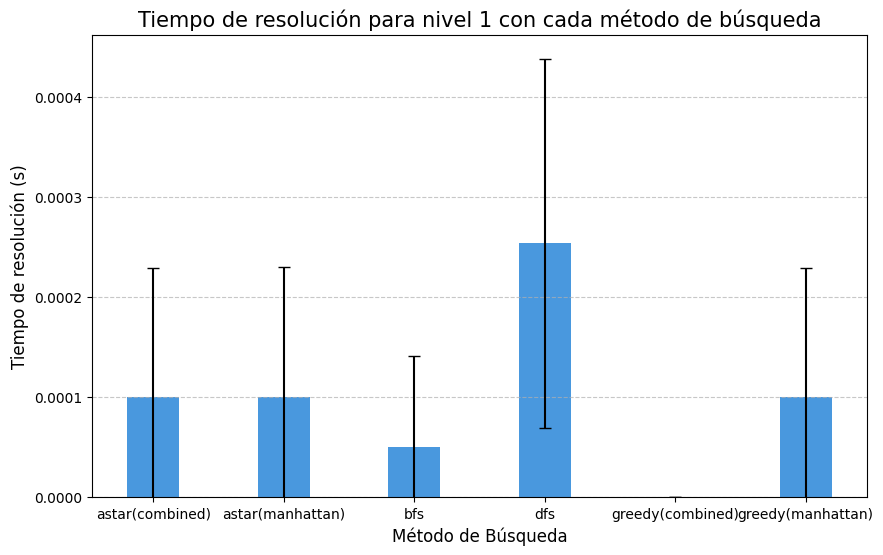

In [95]:
level_data = final_df.loc[final_df['level'] == 'level1.txt'].groupby(['method'], as_index=False)
mean_data = level_data.mean(numeric_only=True)
methods = mean_data['method'].tolist()
runtime = mean_data['runtime'].tolist()
std_error_runtime = (level_data.std(numeric_only=True)['runtime'] / np.sqrt(len(level_data['runtime'].mean()['runtime']))).tolist()

plt.figure(figsize=(10,6))
plt.bar(methods, runtime, yerr=std_error_runtime, capsize=4, color='#4998de', width=0.4)
plt.title('Tiempo de resolución para nivel 1 con cada método de búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Tiempo de resolución (s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0)
plt.show()

### Nivel 2

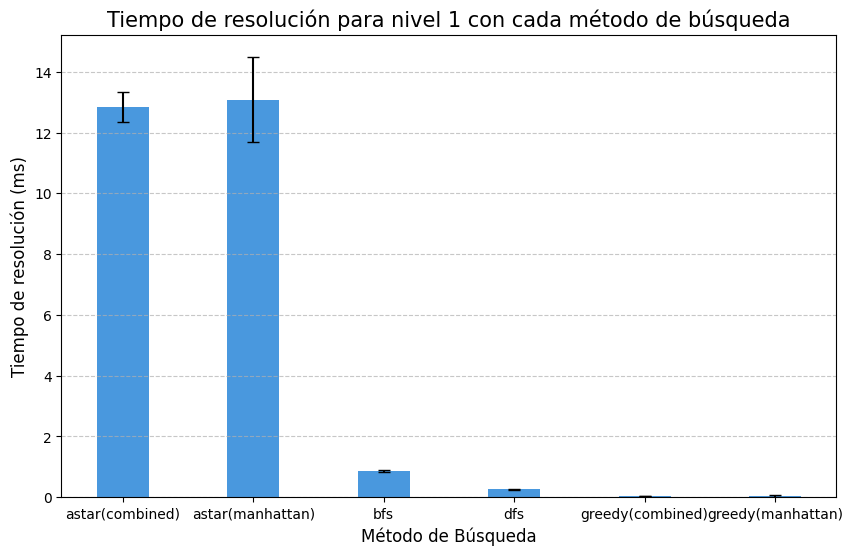

In [102]:
level_data = final_df.loc[final_df['level'] == 'level2.txt'].groupby(['method'], as_index=False)
mean_data = level_data.mean(numeric_only=True)

methods = mean_data['method'].tolist()
runtime = mean_data['runtime'].tolist()
std_error_runtime = (level_data.std(numeric_only=True)['runtime'] / np.sqrt(len(level_data['runtime'].mean()['runtime']))).tolist()

plt.figure(figsize=(10,6))
plt.bar(methods, runtime, yerr=std_error_runtime, capsize=4, color='#4998de', width=0.4)
plt.title('Tiempo de resolución para nivel 2 con cada método de búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Tiempo de resolución (s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0)
plt.show()

### Nivel 3

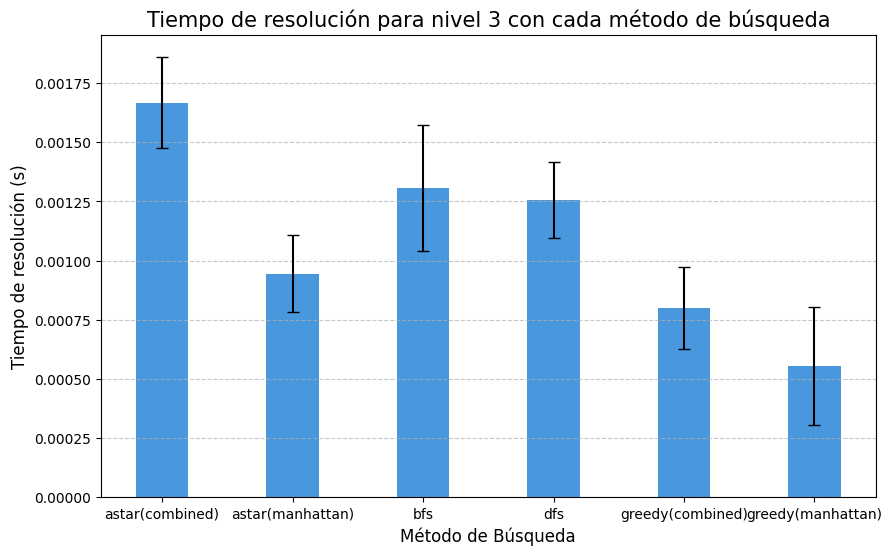

In [103]:
level_data = final_df.loc[final_df['level'] == 'level3.txt'].groupby(['method'], as_index=False)
mean_data = level_data.mean(numeric_only=True)

methods = mean_data['method'].tolist()
runtime = mean_data['runtime'].tolist()
std_error_runtime = (level_data.std(numeric_only=True)['runtime'] / np.sqrt(len(level_data['runtime'].mean()['runtime']))).tolist()

plt.figure(figsize=(10,6))
plt.bar(methods, runtime, yerr=std_error_runtime, capsize=4, color='#4998de', width=0.4)
plt.title('Tiempo de resolución para nivel 3 con cada método de búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Tiempo de resolución (s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0)
plt.show()

### Nivel 4

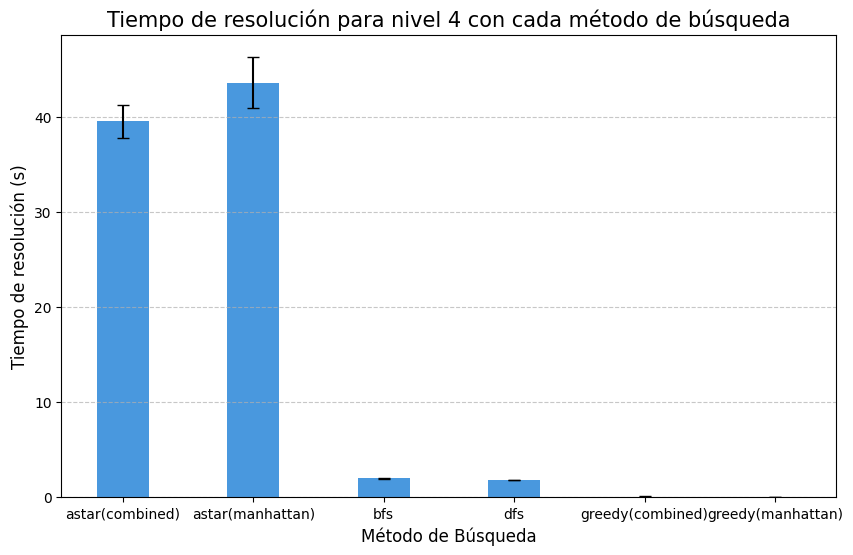

In [104]:
level_data = final_df.loc[final_df['level'] == 'level4.txt'].groupby(['method'], as_index=False)
mean_data = level_data.mean(numeric_only=True)

methods = mean_data['method'].tolist()
runtime = mean_data['runtime'].tolist()
std_error_runtime = (level_data.std(numeric_only=True)['runtime'] / np.sqrt(len(level_data['runtime'].mean()['runtime']))).tolist()

plt.figure(figsize=(10,6))
plt.bar(methods, runtime, yerr=std_error_runtime, capsize=4, color='#4998de', width=0.4)
plt.title('Tiempo de resolución para nivel 4 con cada método de búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Tiempo de resolución (s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0)
plt.show()